# Objective 

* notebook to work through example 1

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import subprocess
import math

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from src.variables import energyplus_install_dir
from src.parsing import parse_energyplus_datetime_string, print_subprocess_results

In [8]:
idf_file_relative = Path("example1/PythonPluginWindowShadeControl.idf")
weather_file_realtive = Path("./weatherfiles/USA_IL_Chicago-OHare.Intl.AP.725300_TMY3.epw")
output_relative_directory='./example1/sim'

In [9]:
# readvars - included to create a .csv file of the results

# a slightly modified run command
result = subprocess.run([f"{energyplus_install_dir}/energyplus", "--readvars",
                         "--output-directory", f"{output_relative_directory}",
                         "--weather", f"{weather_file_realtive}",
                         f"{idf_file_relative}"
                        ],
                        capture_output=True
                       )


In [10]:
print_subprocess_results(result)

---ARGS---
 ['/Applications/EnergyPlus-22-1-0/energyplus', '--readvars', '--output-directory', './example1/sim', '--weather', 'weatherfiles/USA_IL_Chicago-OHare.Intl.AP.725300_TMY3.epw', 'example1/PythonPluginWindowShadeControl.idf']
---RETURNCODE---
 0 (SUCCESS)
---STDOUT---
 EnergyPlus Starting
EnergyPlus, Version 22.1.0-ed759b17ee, YMD=2022.06.11 13:48
Adjusting Air System Sizing
Adjusting Standard 62.1 Ventilation Sizing
Initializing Simulation
Reporting Surfaces
Beginning Primary Simulation
Initializing New Environment Parameters
Warming up {1}
Warming up {2}
Warming up {3}
Warming up {4}
Warming up {5}
Warming up {6}
Starting Simulation at 01/21 for CHICAGO_IL_USA ANNUAL HEATING 99% DESIGN CONDITIONS DB
Initializing New Environment Parameters
Warming up {1}
Warming up {2}
Warming up {3}
Warming up {4}
Warming up {5}
Warming up {6}
Starting Simulation at 07/21 for CHICAGO_IL_USA ANNUAL COOLING 1% DESIGN CONDITIONS DB/MCWB
Writing tabular output file results using HTML format.
 Rea

Bad pipe message: %s [b'che\r\nCache-Control: no-cache\r\nUser-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWeb', b't/537.36 (KHTML, like Gecko) Chrome/102.0.5005.115 Safari/537.36\r\nUpgrade:', b'ebsocket\r\nOrigin: chrome-extens', b'n://aomjjhallfgjeglblehebfpbcfeobpgk\r\nSec-WebSocket-Version: 13\r\nAccept-Encoding: gzip, deflate, br\r\nAcc', b't-Language: en-US,en;q=0.9\r\nSec-WebSocket-Key: X8ONz3jHsXc17IKUaE5SZQ==\r\nSec-WebSocket-Extensions: p']
Bad pipe message: %s [b'che\r\nCache-Control: no-cache\r\nUser-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWeb', b't/537.36 (KHTML, like Gecko) Chrome/102.0.5005.115 Safari/537.36\r\nUpgrade:', b'ebsocket\r\nOrigin: chrome-extens', b'n://aomjjhallfgjeglblehebfpbcfeobpgk\r\nSec-WebSocket-Version: 13\r\nAccept-Encoding: gzip, deflate, br\r\nAcc', b't-Language: en-US,en;q=0.9\r\nSec-WebSocket-Key: 5X5Acopwe1BLmMTW0DQ5dw==\r\nSec-WebSocket-Extensions: p']
Bad pipe message: %s [b'che\r\nCache-Control: no-cache\r

# review the values

In [11]:
df=pd.read_csv("example1/sim/eplusout.csv", 
               parse_dates=[0],
               index_col=[0],
               date_parser=parse_energyplus_datetime_string 
              )


Text(0, 0.5, 'Incident Angle')

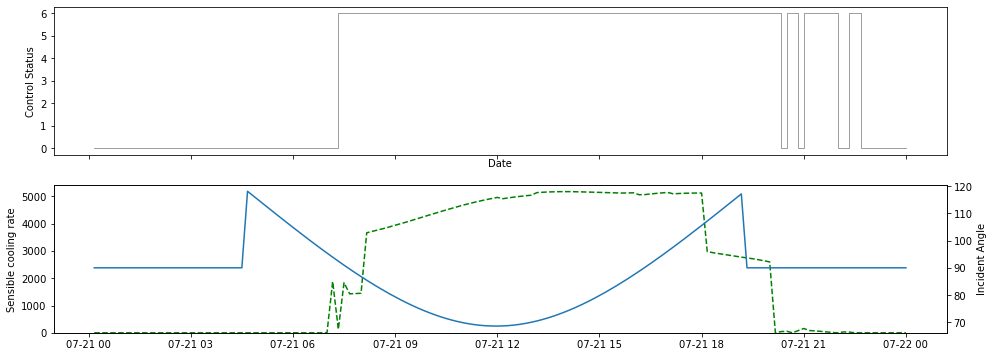

In [28]:
fig, (ax,ax2) = plt.subplots(2,1,figsize=(16,6), sharex=True)

df_trim = df['2021-07-01':'2021-08-01']
ax.plot(df_trim['Shading Control Status:PythonPlugin:OutputVariable [](TimeStep) '],  
        color='grey',
        linewidth=0.75,
        drawstyle='steps-post'
       )
ax.set_xlabel('Date')
ax.set_ylabel('Control Status')  

ax3 = ax2.twinx()
ax2.plot(df_trim['WEST ZONE:Zone Air System Sensible Cooling Rate [W](TimeStep)'],
        color='g',
        linestyle='dashed')

ax3.plot(df_trim['ZN001:WALL001:WIN001:Surface Outside Face Beam Solar Incident Angle Cosine Value [](TimeStep)']\
         .apply(math.acos)\
         .apply(math.degrees)
        )

ax2.set_ylim(0,)
ax2.set_ylabel('Sensible cooling rate')
ax3.set_ylabel('Incident Angle')